In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys



# add paths to rgc_model, symphony_data, lnp, analysis_utils, datajoint, config, data_modules
sys.path.append('/Users/niloughazavi/Documents/GitHub/rgc_model')
sys.path.append('/Users/niloughazavi/Documents/GitHub/MEA/src/analysis/symphony_data')
sys.path.append('/Users/niloughazavi/Documents/GitHub/MEA/src/analysis/lnp')
sys.path.append('/Users/niloughazavi/Documents/GitHub/MEA/src/analysis/analysis_utils')
sys.path.append('/Users/niloughazavi/Documents/GitHub/datajoint')
sys.path.append('/Users/niloughazavi/Documents/GitHub/MEA/src/analysis/config')
sys.path.append('/Users/niloughazavi/Documents/GitHub/datajoint/data_modules')


import data_utils as du
import spikeoutputs as so
import spikeplots as sp
import meaqc
import eicorr
import importlib
import os
import pickle
importlib.reload(so)
importlib.reload(sp)
importlib.reload(meaqc)

<module 'meaqc' from '/Users/niloughazavi/Documents/GitHub/datajoint/data_modules/meaqc.py'>

In [2]:
d_meta = {'str_experiment': '20240229C',
          'str_protocol': 'dovesmovie',
          'str_algo': 'kilosort2',
          'paramsfile': '/Volumes/data/analysis/20240229C/chunk4/kilosort2/kilosort2.params',
          'dataset_name': 'kilosort2',
          'str_classification': '/Volumes/data/analysis/20240229C/chunk4/kilosort2/vr_kilosort2.classification.txt',
          'ls_RGC_labels': ['OffP', 'OffM', 'OnP', 'OnM'],
          'ls_filenames': ['data013', 'data014'],
          'ls_noise_filenames': ['data018']}
data = so.SpikeOutputs(**d_meta)
data.load_sta_from_params(load_ei=True, load_neurons=True, 
                          isi_bin_edges=np.linspace(0,300,601), 
                          b_flip_y=True)

Loading STA RF fits from /Volumes/data/analysis/20240229C/chunk4/kilosort2/kilosort2.params...
Loaded STA RF fits for 951 cells.
Flipped y0 values, so RFs are in sta matrix space with (0,0) in top left.
Loading WN ISI...
Loading ISI for manookinlab.protocols.SpatialNoise ['data018']...
Processing group 1 of 1 and block 1 of 1
Loaded ISI for 951 cells.


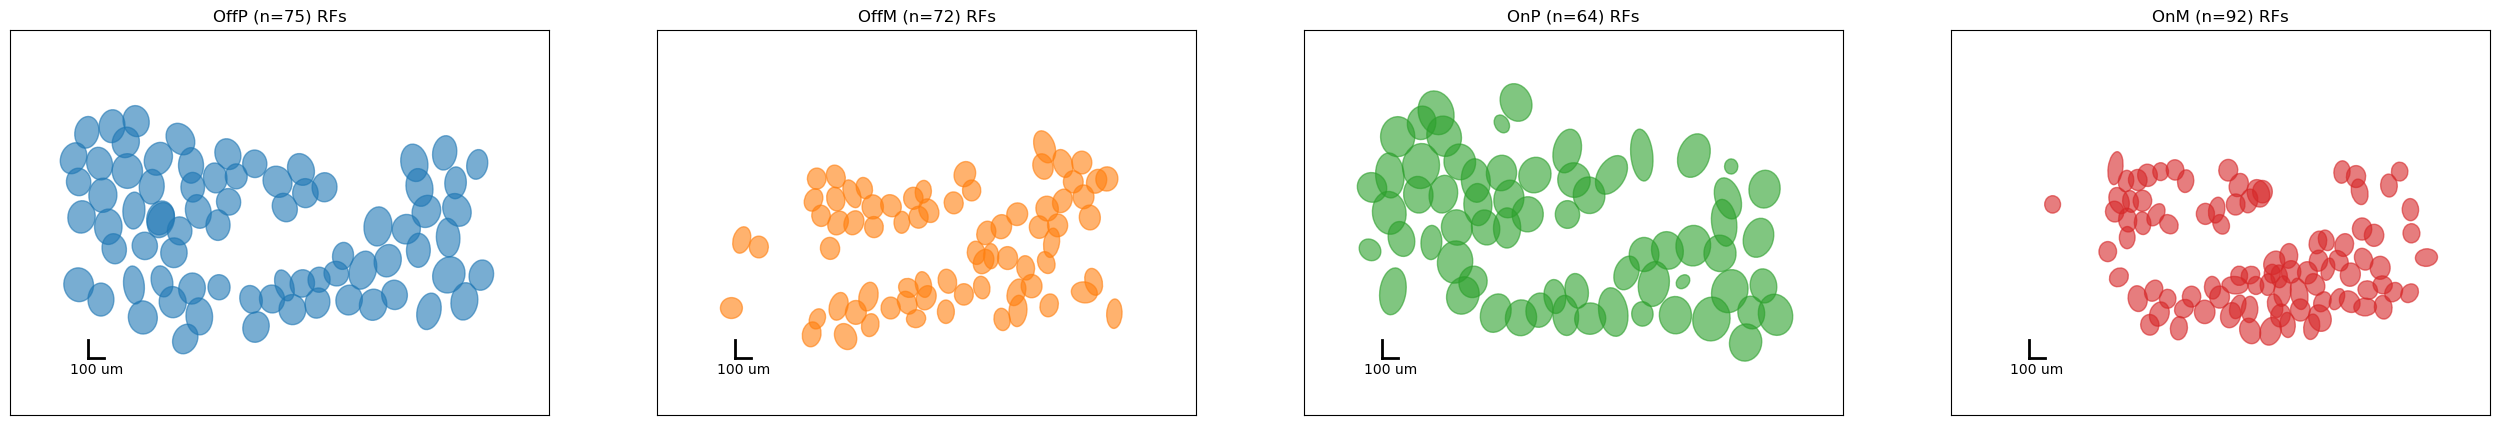

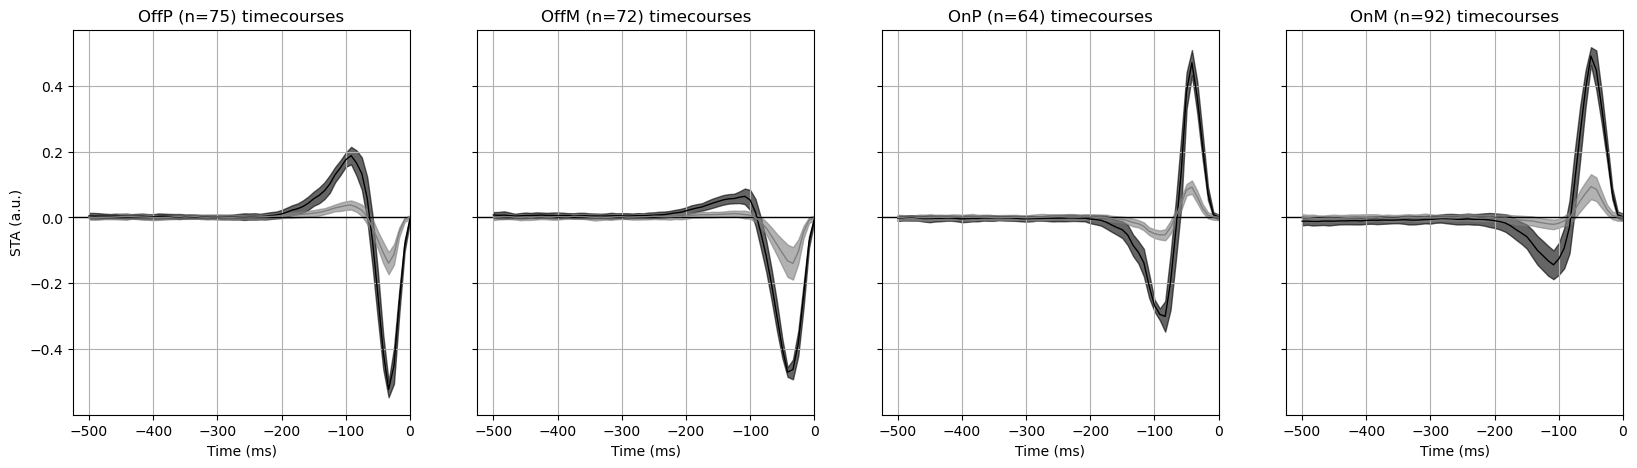

In [3]:
importlib.reload(sp)
sp.plot_type_rfs(data, sd_mult=0.8, b_zoom=True);
sp.plot_type_tcs(data);

## Load doves chunk EIs and compute EI correlations

In [4]:
str_doves_chunk_dir = '/Volumes/data/data/sorted/20240229C/doves/kilosort2/'
data.load_protocol_vcd(str_doves_chunk_dir, 'kilosort2')

Loading protocol VCD from /Volumes/data/data/sorted/20240229C/doves/kilosort2/...


Computing EI energy maps
Loading EI correlation from /Users/niloughazavi/Documents/Mike_Data/analysis/20240229C/chunk4/kilosort2/chunk4_to_doves_ei.pkl
EI correlation already exists


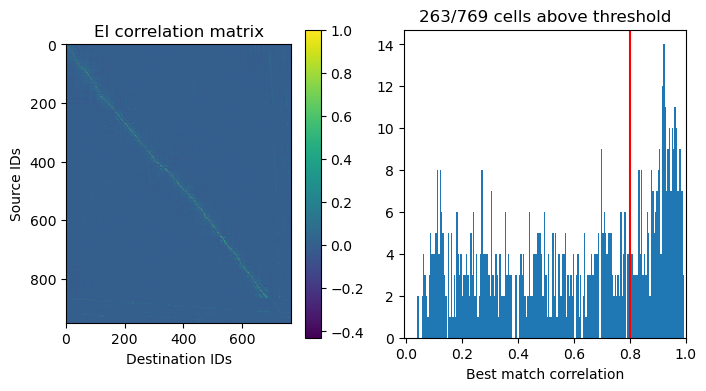

In [5]:
importlib.reload(eicorr)
str_save_eic = '/Users/niloughazavi/Documents/Mike_Data/analysis/20240229C/chunk4/kilosort2/chunk4_to_doves_ei.pkl'
mapper = eicorr.MapAcrossChunk(data.vcd, data.p_vcd, str_save_eic)
mapper.compute_ei_corr()
eicorr.plot_ei_corr_summary(mapper)

## Save EI mapping plots

In [6]:
# Commenting out as already saved
str_save_plots = '/Users/niloughazavi/Documents/Mike_Data/analysis/20240229C/chunk4/kilosort2/chunk4_to_doves_ei/'
# eicorr.plot_ei_analysis_all(mapper, data, n_thresh=0.8,
#                             str_savedir=str_save_plots)

Based on these plots, a threshold of 0.7 seems better

In [7]:
importlib.reload(eicorr)
str_matched_txt = os.path.join(str_save_plots, 'doves.classification.txt')
str_mapping_txt = os.path.join(str_save_plots, 'chunk4_to_doves.txt')
eicorr.save_and_remap_typing_data(str_matched_txt, str_mapping_txt, mapper, data, data.ls_RGC_labels,
                                n_thresh=0.7)

OffP: 55/75 1:1 matches found.
OffP: 2/75 1:many matches found (will not use).
OffP: 3/75 many:1 matches found (will not use).

OffM: 51/72 1:1 matches found.
OffM: 1/72 1:many matches found (will not use).
OffM: 8/72 many:1 matches found (will not use).

OnP: 41/64 1:1 matches found.
OnP: 2/64 1:many matches found (will not use).
OnP: 5/64 many:1 matches found (will not use).

OnM: 30/92 1:1 matches found.
OnM: 3/92 1:many matches found (will not use).
OnM: 6/92 many:1 matches found (will not use).

Saved matched typing file to /Users/niloughazavi/Documents/Mike_Data/analysis/20240229C/chunk4/kilosort2/chunk4_to_doves_ei/doves.classification.txt
Saved mapping to /Users/niloughazavi/Documents/Mike_Data/analysis/20240229C/chunk4/kilosort2/chunk4_to_doves_ei/chunk4_to_doves.txt
Reloaded types from /Users/niloughazavi/Documents/Mike_Data/analysis/20240229C/chunk4/kilosort2/chunk4_to_doves_ei/doves.classification.txt.
Remapped to 177 cells.
Updated typing data and remapped SpikeOutputs sta

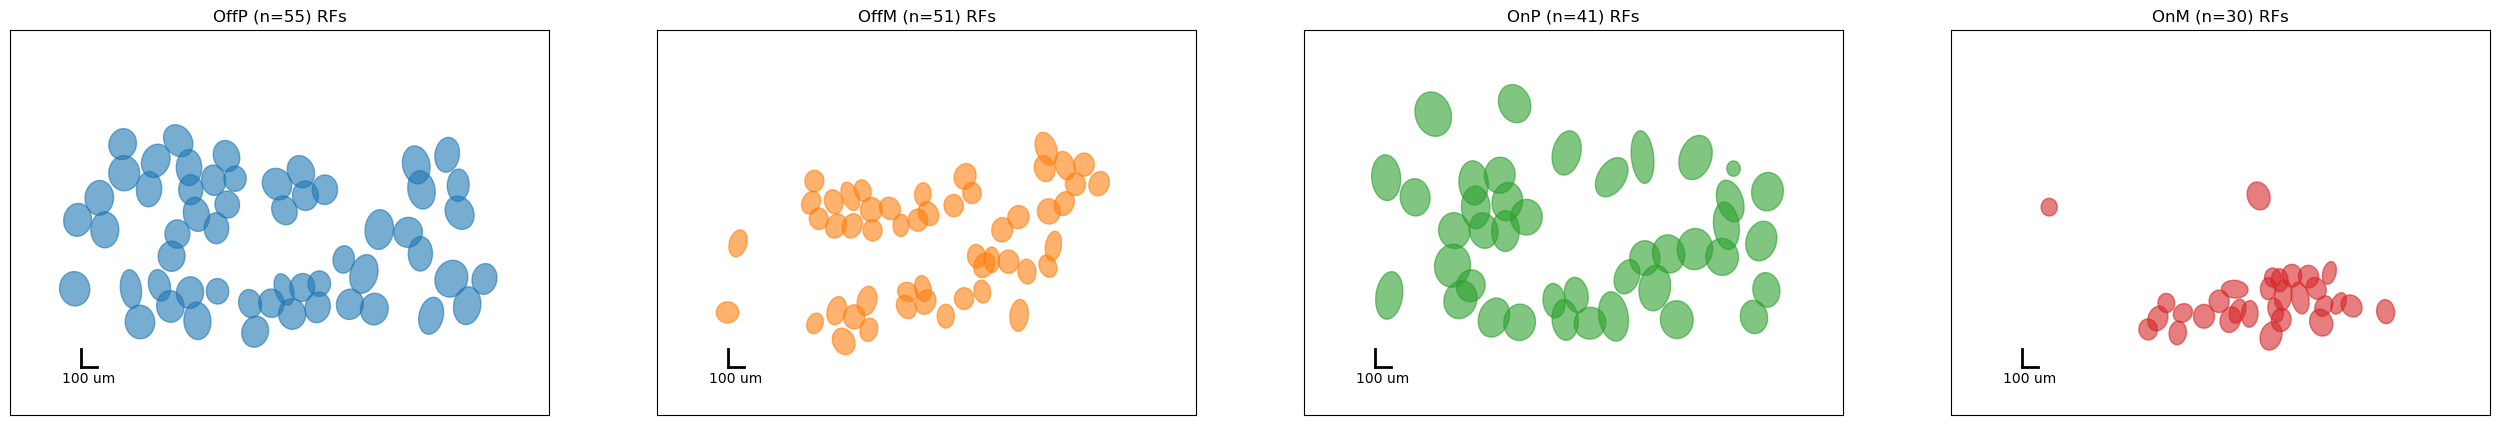

In [8]:
sp.plot_type_rfs(data, sd_mult=0.8, b_zoom=True);

## Load doves PSTHs

In [9]:
param_names = ['stimulusIndex', 'preTime', 'stimTime', 'tailTime', 'waitTime']
data.load_psth('DovesMovie', param_names)

Processing group 1 of 1 and block 1 of 2


Processing epochs in block file data013: 100%|██| 22/22 [00:00<00:00, 29.45it/s]


Processing group 1 of 1 and block 2 of 2


Processing epochs in block file data014: 100%|█| 161/161 [00:08<00:00, 19.15it/s


Updating GOOD_CELL_IDS to 177 cells.
OffP: 55/55
OffM: 51/51
OnP: 41/41
OnM: 30/30
Loading ISI for DovesMovie ['data013', 'data014']...
Processing group 1 of 1 and block 1 of 2
Processing group 1 of 1 and block 2 of 2
Loaded ISI for 769 cells.


In [10]:
data.print_stim_summary()

Epoch length: 6750.00 ms
Total epochs: 183
pre: 250.00 ms; stim: 6000.00 ms; tail: 500.00 ms
pre pts: 25; stim pts: 600; tail pts: 50
bin rate: 100.00 Hz; bin dt: 10.00 ms


Text(0, 0.5, 'Count')

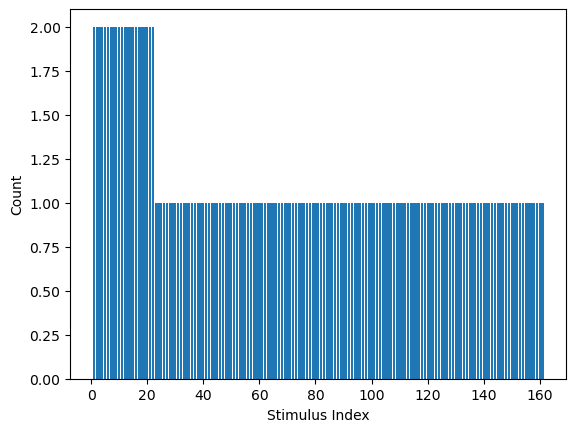

In [11]:
plt.bar(*np.unique(data.stim['params']['stimulusIndex'], return_counts=True))
plt.xlabel('Stimulus Index')
plt.ylabel('Count')

## QC
Based on ISI and nspikes

In [12]:
qc = meaqc.QC(data)

Using first 3 bins for refractory period calculation.
isi_bins: [[0.  0.5]
 [0.5 1. ]
 [1.  1.5]]
177 noise cells, 769 protocol cells, 177 cells with >0 sps in both.
OffP: 55 noise, 55 protocol, 55 both.
OffM: 51 noise, 51 protocol, 51 both.
OnP: 41 noise, 41 protocol, 41 both.
OnM: 30 noise, 30 protocol, 30 both.
Updating GOOD_CELL_IDS to 177 cells.
OffP: 55/55
OffM: 51/51
OnP: 41/41
OnM: 30/30


In [13]:
qc.set_abs_thresh('set1', 'noise_isi_violations', 0.01)
qc.set_pct_thresh_by_type('set1', 'noise_spikes', 80)

Setting noise_isi_violations threshold at < 0.01.
126/177 total cells kept.


,n_good,n_total,pct
cell_type,,,
OffP,29,55,0.53
OffM,40,51,0.78
OnP,33,41,0.80
OnM,24,30,0.80


Setting noise_spikes top 80 percentile threshold.


/Users/niloughazavi/Documents/GitHub/datajoint/data_modules/meaqc.py:361: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_keep[str_param].fillna(True, inplace=True)


,n_good,n_total,pct,cutoff
cell_type,,,,
OffP,44,55,0.80,86484.6
OffM,40,51,0.78,24060.0
OnP,32,41,0.78,37295.0
OnM,24,30,0.80,23852.2


In [14]:
qc.set_abs_thresh('set1', 'protocol_isi_violations', 0.01)
qc.set_pct_thresh_by_type('set1', 'protocol_spikes', 80)

Setting protocol_isi_violations threshold at < 0.01.
134/177 total cells kept.


,n_good,n_total,pct
cell_type,,,
OffP,41,55,0.75
OffM,38,51,0.75
OnP,28,41,0.68
OnM,27,30,0.90


Setting protocol_spikes top 80 percentile threshold.


/Users/niloughazavi/Documents/GitHub/datajoint/data_modules/meaqc.py:361: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_keep[str_param].fillna(True, inplace=True)


,n_good,n_total,pct,cutoff
cell_type,,,,
OffP,44,55,0.80,5887.4
OffM,40,51,0.78,3572.0
OnP,32,41,0.78,1690.0
OnM,24,30,0.80,1347.0


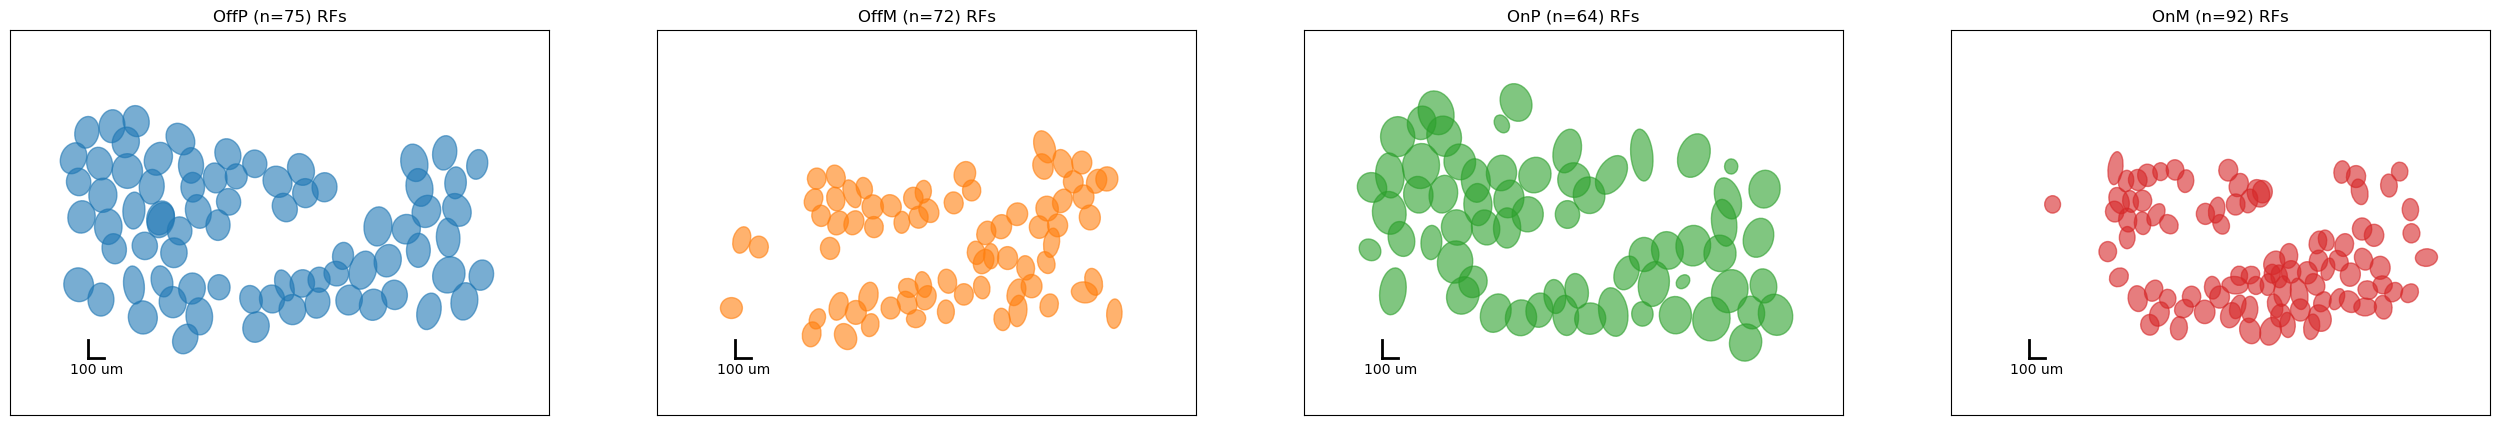

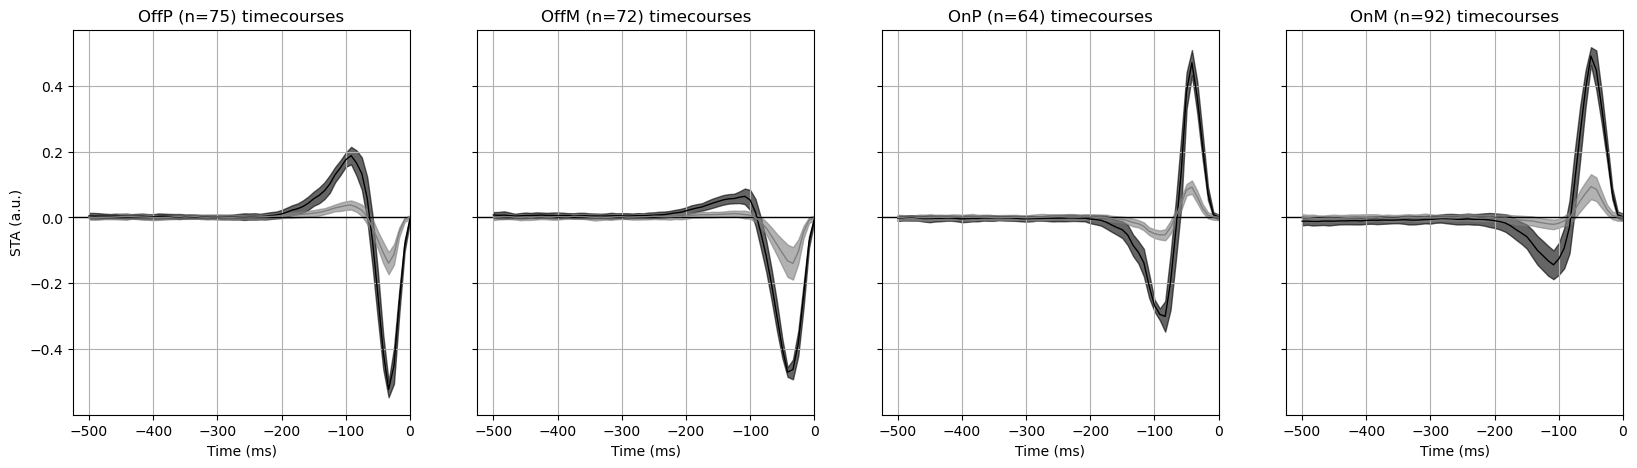

In [3]:
importlib.reload(sp)
sp.plot_type_rfs(data, sd_mult=0.8, b_zoom=True);
sp.plot_type_tcs(data);

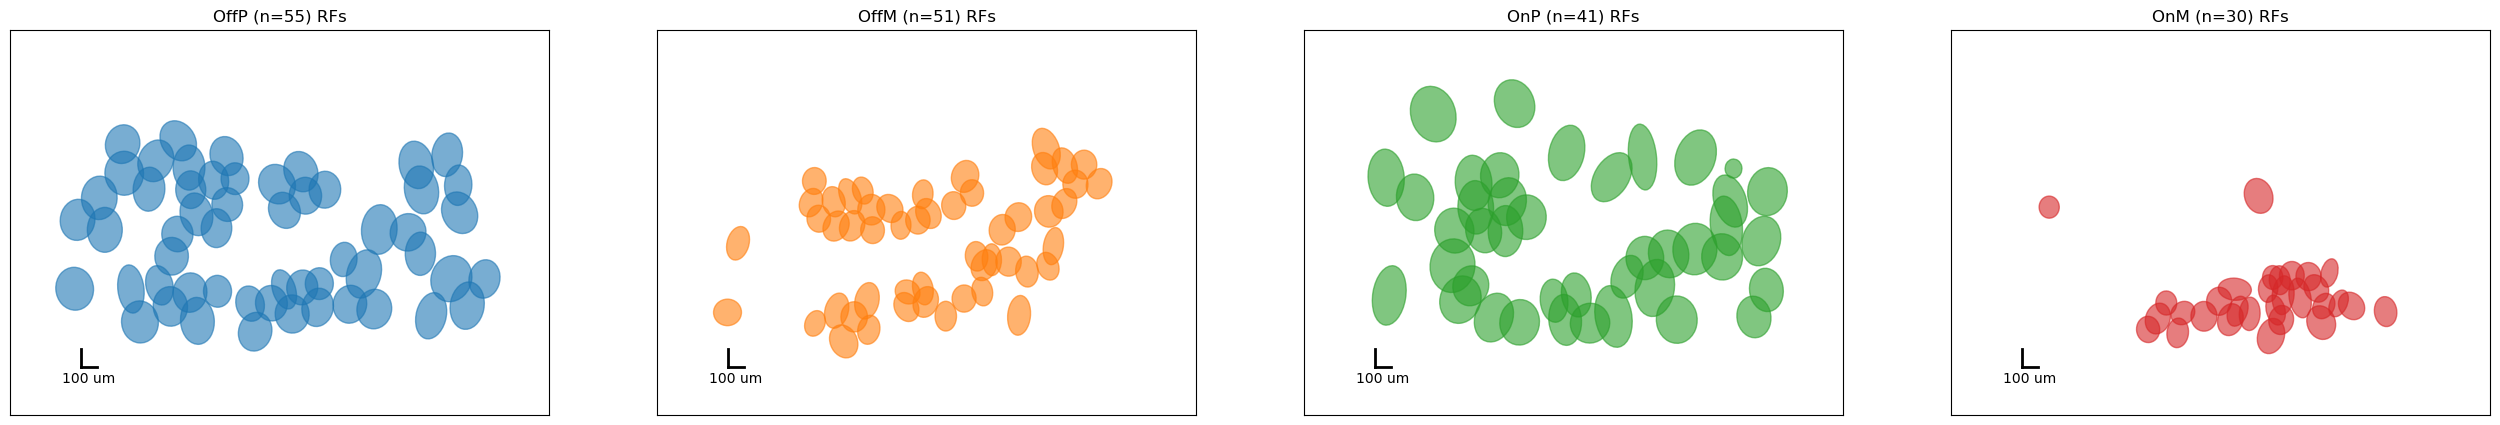

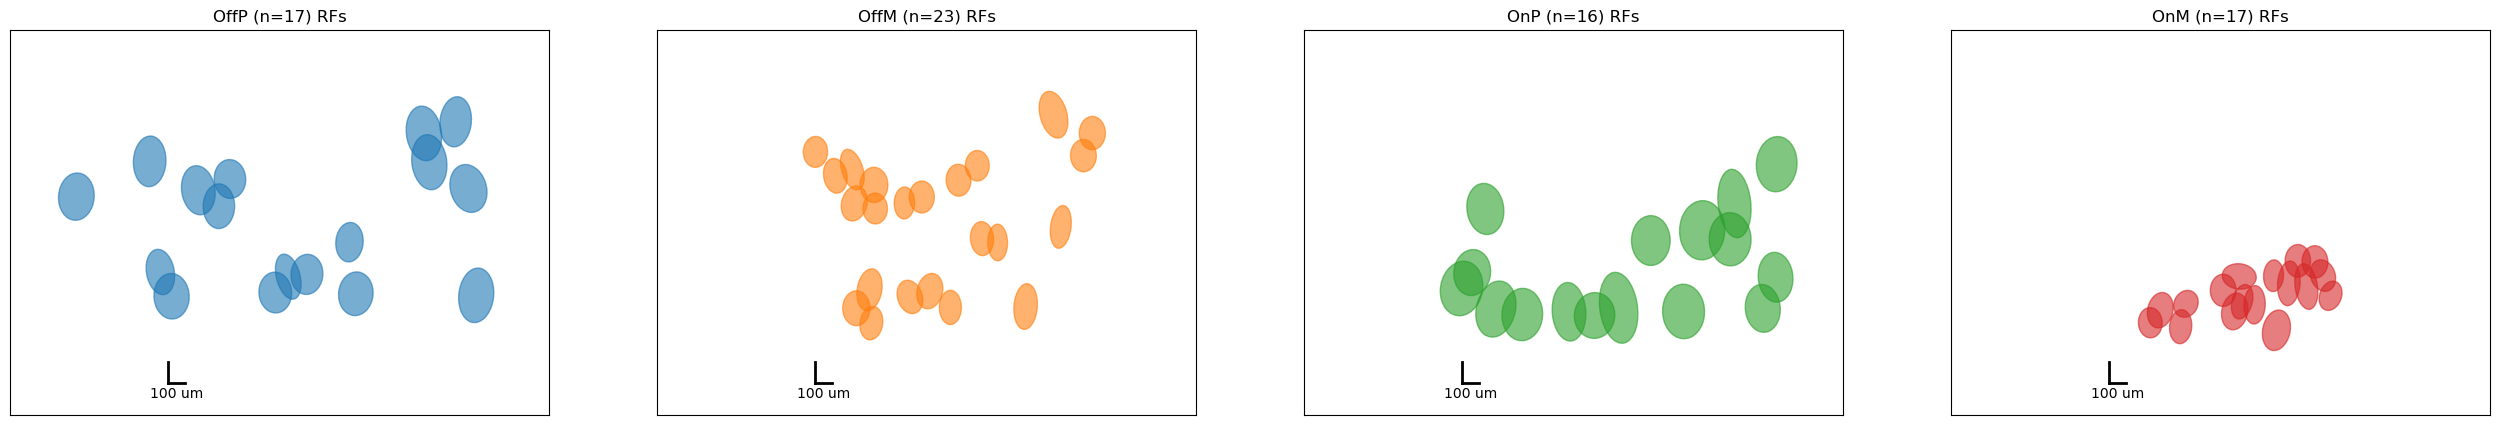

In [15]:
qc_params = ['noise_spikes', 'noise_isi_violations', 'protocol_spikes', 'protocol_isi_violations']
qc.plot_mosaics(qc_params)

In [16]:
qc.update_ids(['noise_isi_violations', 'protocol_isi_violations', 'noise_spikes', 'protocol_spikes'],
              'set1')

Updating GOOD_CELL_IDS to 73 cells.
OffP: 17/55
OffM: 23/51
OnP: 16/41
OnM: 17/30


Great, we have our quality-controlled set of cells for the 4 main cell types! Let's save out the final cell IDs from both the noise and doves chunks for ease of loading in the future.

In [17]:
str_qc_src_txt = '/Users/niloughazavi/Documents/Mike_Data/analysis/20240229C/chunk4/kilosort2/qc_vr_kilosort2.classification.txt'
str_qc_dest_txt = '/Users/niloughazavi/Documents/Mike_Data/analysis/20240229C/chunk4/kilosort2/chunk4_to_doves_ei/qc_doves.classification.txt'
eicorr.save_qc_class_txt(str_qc_src_txt, str_qc_dest_txt,
                         mapper, data, 
                         data.ls_RGC_labels)

Saved source IDs QC typing file to /Users/niloughazavi/Documents/Mike_Data/analysis/20240229C/chunk4/kilosort2/qc_vr_kilosort2.classification.txt
Saved dest IDs QC typing file to /Users/niloughazavi/Documents/Mike_Data/analysis/20240229C/chunk4/kilosort2/chunk4_to_doves_ei/qc_doves.classification.txt


## Get response spike times to DOVES

In [18]:
param_names = ['stimulusIndex', 'preTime', 'stimTime', 'tailTime', 'waitTime', 'backgroundIntensity']
data.load_spike_times('DovesMovie', param_names, bin_rate=1000.0)


Processing group 1 of 1 and block 1 of 2


Processing epochs in block file data013: 100%|█| 22/22 [00:00<00:00, 197.76it/s]


Processing group 1 of 1 and block 2 of 2


Processing epochs in block file data014: 100%|█| 161/161 [00:01<00:00, 155.74it/

Updating GOOD_CELL_IDS to 73 cells.
OffP: 17/17
OffM: 23/23
OnP: 16/16
OnM: 17/17
ISI for DovesMovie already loaded.


In [19]:
data.print_stim_summary()

Epoch length: 6750.00 ms
Total epochs: 183
pre: 250.00 ms; stim: 6000.00 ms; tail: 500.00 ms
pre pts: 250; stim pts: 6000; tail pts: 500
bin rate: 1000.00 Hz; bin dt: 1.00 ms


In [20]:
data.spikes['spike_dict'].shape, data.GOOD_CELL_IDS.shape, data.spikes['cluster_id'].shape

((769, 183), (73,), (769,))

In [21]:
data.N_HEIGHT, data.N_WIDTH

(95.0, 152.0)

In [22]:
# get frame times
import symphony_data as sd
c_data = sd.Dataset(data.str_experiment)
frame_times = c_data.get_frame_times('DovesMovie', file_name=data.ls_filenames)

Pulling frame times: 100%|███████████████| 161/161 [00:00<00:00, 3041815.06it/s]


# Output structure

In [23]:
d_save = {'spike_dict': data.spikes['spike_dict'],
          'cluster_id': data.spikes['cluster_id'],
          'stimulusIndex': data.stim['params']['stimulusIndex'],
          'backgroundIntensity': data.stim['params']['backgroundIntensity'],
          'pre_pts': data.stim['n_pre_pts'],
          'stim_pts': data.stim['n_stim_pts'],
          'tail_pts': data.stim['n_tail_pts'],
          'wait_time': data.stim['params']['waitTime'],
          'bin_rate': data.stim['bin_rate'],
          'frame_rate': 59.941548817817917,
          'numXChecks': data.N_WIDTH,
          'numYChecks': data.N_HEIGHT,
          'frame_times': frame_times,
          'cell_types': data.types.d_main_IDs}

In [24]:
str_save = '/Users/niloughazavi/Documents/Mike_Data/Nilou_MEA/spikeoutputs/dovesmovie/20240229C_DovesMovie_kilosort2_data013_data014_spiketimes.pkl'
with open(str_save, 'wb') as f:
    pickle.dump(d_save, f)

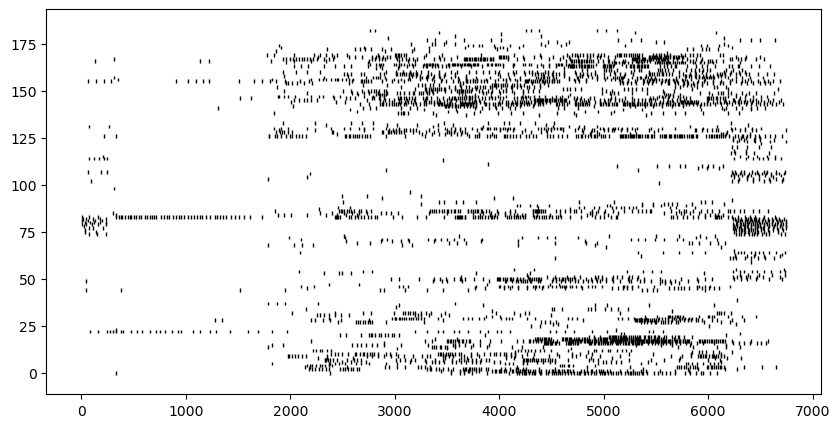

In [37]:
# See example spiketime
eg_id = data.get_type_ids('OnM')[16]
eg_idx = np.where(data.spikes['cluster_id'] == eg_id)[0][0]
eg_spike_times = data.spikes['spike_dict'][eg_idx]
f, ax = plt.subplots(1, 1, figsize=(10, 5))
for i, st in enumerate(eg_spike_times):
    ax.eventplot(st, lineoffsets=i, colors='k', linelengths=2, linewidths=1)

In [42]:
data.get_type_ids('OffP')

array([ 435,  451,  467,  496,  571,  628,  801,  831,  882,  971,  977,
       1050, 1149, 1307, 1347, 1427, 1432])

In [44]:
data.get_type_ids('OnP')

array([ 509,  556,  624,  654,  706,  781,  862,  907, 1029, 1060, 1109,
       1195, 1206, 1222, 1291, 1362])